# Kaggle competitions process
>  In this first chapter, you will get exposure to the Kaggle competition process. You will train a model and prepare a csv file ready for submission. You will learn the difference between Public and Private test splits, and how to prevent overfitting.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Winning a Kaggle Competition in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Competitions overview

### Explore train data

<div class=""><p>You will work with another Kaggle competition called "Store Item Demand Forecasting Challenge". In this competition, you are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items in 10 different stores. </p>
<p>To begin, let's explore the train data for this competition. For the faster performance, you will work with a subset of the train data containing only a single month history.</p>
<p>Your initial goal is to read the input data and take the first look at it.</p></div>

Instructions
<ul>
<li>Import <code>pandas</code> as <code>pd</code>.</li>
<li>Read train data using <code>pandas</code>' <code>read_csv()</code> method.</li>
<li>Print the head of the train data (using <code>head()</code> method) to see the data sample.</li>
</ul>

In [2]:
# Import pandas
import pandas as pd

# Read train data
train = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/23-winning-a-kaggle-competition-in-python/datasets/demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
print(train.head())

Train shape: (15500, 5)
       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


**It contains 15,500 daily observations of the sales data.**

### Explore test data

Instructions 1/2
<ul>
<li>Read the test dataset.</li>
<li>Print the column names of the train and test datasets.</li>
</ul>

In [4]:
# Read the test data
test = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/23-winning-a-kaggle-competition-in-python/datasets/demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


Instructions 2/2
<ul>
<li>Notice that test columns do not have the target "sales" column. Now, read the sample submission file.</li>
<li>Look at the head of the submission file to get the output format.</li>
</ul>

In [6]:
# Read the sample submission file
sample_submission = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/23-winning-a-kaggle-competition-in-python/datasets/sample_submission.csv')

# Look at the head() of the sample submission
print(sample_submission.head())

   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


**The sample submission file consists of two columns: id of the observation and sales column for your predictions. Kaggle will evaluate your predictions on the true sales data for the corresponding id. So, it’s important to keep track of the predictions by id before submitting them.**

## Prepare your first submission

### Determine a problem type

<div class=""><p>You will keep working on the Store Item Demand Forecasting Challenge. Recall that you are given a history of store-item sales data, and asked to predict 3 months of the future sales. </p>
<p>Before building a model, you should determine the problem type you are addressing. The goal of this exercise is to look at the distribution of the target variable, and select the correct problem type you will be building a model for.</p>
<p>The <code>train</code> DataFrame is already available in your workspace. It has the target variable column called "sales". Also, <code>matplotlib.pyplot</code> is already imported as <code>plt</code>.</p></div>

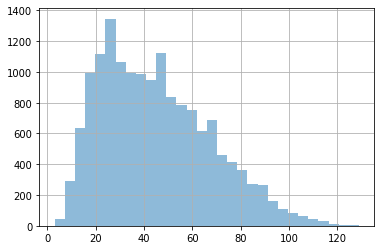

In [8]:
train.sales.hist(bins=30, alpha=0.5)
plt.show()

<pre>
Possible Answers
Classification.
<b>Regression.</b>
Clustering
</pre>

**The sales variable is continuous, so you're solving a regression problem.**

### Train a simple model

<div class=""><p>As you determined, you are dealing with a regression problem. So, now you're ready to build a model for a subsequent submission. But now, instead of building the simplest Linear Regression model as in the slides, let's build an out-of-box Random Forest model.</p>
<p>You will use the <code>RandomForestRegressor</code> class from the <code>scikit-learn</code> library.</p>
<p>Your objective is to train a Random Forest model with default parameters on the "store" and "item" features.</p></div>

Instructions
<ul>
<li>Read the train data using <code>pandas</code>.</li>
<li>Create a Random Forest object.</li>
<li>Train the Random Forest model on the "store" and "item" features with "sales" as a target.</li>
</ul>

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Read the train data
#train = pd.read_csv('train.csv')

# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Prepare a submission

<div class=""><p>You've already built a model on the training data from the Kaggle Store Item Demand Forecasting Challenge. Now, it's time to make predictions on the test data and create a submission file in the specified format.</p>
<p>Your goal is to read the test data, make predictions, and save these in the format specified in the "sample_submission.csv" file. The <code>rf</code> object you created in the previous exercise is available in your workspace.</p>
<p>Note that starting from now and for the rest of the course, <code>pandas</code> library will be always imported for you and could be accessed as <code>pd</code>.</p></div>

Instructions 1/2
<ul>
<li>Read "test.csv" and "sample_submission.csv" files using <code>pandas</code>.</li>
<li>Look at the head of the sample submission to determine the format.</li>
</ul>

In [15]:
# Read test and sample submission data
#test = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/23-winning-a-kaggle-competition-in-python/datasets/demand_forecasting_test.csv')
#sample_submission = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/23-winning-a-kaggle-competition-in-python/datasets/sample_submission.csv')

# Show the head() of the sample_submission
print(sample_submission.head())

   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


Instructions 2/2
<ul>
<li>Note that sample submission has <code>id</code> and <code>sales</code> columns. Now, make predictions on the test data using the <code>rf</code> model, that you fitted on the train data.</li>
<li>Using the format given in the sample submission, write your results to a new file.</li>
</ul>

In [16]:
# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

In [17]:
!head kaggle_submission.csv

id,sales
0,17.20953284381207
1,17.20953284381207
2,17.20953284381207
3,17.20953284381207
4,17.20953284381207
5,17.20953284381207
6,17.20953284381207
7,17.20953284381207
8,17.20953284381207


## Public vs Private leaderboard

### What model is overfitting?

<div class=""><p>Let's say you've trained 4 different models and calculated a metric for both train and validation data sets. For example, the metric is Mean Squared Error (the lower its value the better). Train and validation metrics for all the models are presented in the table below.</p>
<p><strong>Please, select the model that overfits to train data.</strong></p>
<table>
<thead>
<tr>
<th>Model</th>
<th>Train MSE</th>
<th>Validation MSE</th>
</tr>
</thead>
<tbody>
<tr>
<td>Model 1</td>
<td>2.35</td>
<td>2.46</td>
</tr>
<tr>
<td>Model 2</td>
<td>2.20</td>
<td>2.15</td>
</tr>
<tr>
<td>Model 3</td>
<td>2.10</td>
<td>2.14</td>
</tr>
<tr>
<td>Model 4</td>
<td>1.90</td>
<td>2.35</td>
</tr>
</tbody>
</table></div>

<pre>
Possible Answers
Model 1.
Model 2.
Model 3.
<b>Model 4.</b>
</pre>

**Model 4 has considerably lower train MSE compared to other models. However, validation MSE started growing again.**

### Train XGBoost models

<div class=""><p>Every Machine Learning method could potentially overfit. You will see it on this example with XGBoost. Again, you are working with the Store Item Demand Forecasting Challenge. The <code>train</code> DataFrame is available in your workspace.</p>
<p>Firstly, let's train multiple XGBoost models with different sets of hyperparameters using XGBoost's learning API. The single hyperparameter you will change is:</p>
<ul>
<li><code>max_depth</code> - maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.</li>
</ul></div>

Instructions 1/3
<li>Set the maximum depth to 2. Then hit Submit Answer button to train the first model.</li>

In [18]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

Instructions 2/3
<li>Now, set the maximum depth to 8. Then hit Submit Answer button to train the second model.</li>

In [19]:
# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

Instructions 3/3
<li>Finally, set the maximum depth to 15. Then hit Submit Answer button to train the third model.</li>

In [20]:
# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

**now you have 3 different XGBoost models trained. Let's explore them further!**

### Explore overfitting XGBoost

<div class=""><p>Having trained 3 XGBoost models with different maximum depths, you will now evaluate their quality. For this purpose, you will measure the quality of each model on both the train data and the test data. As you know by now, the train data is the data models have been trained on. The test data is the next month sales data that models have never seen before.</p>
<p>The goal of this exercise is to determine whether any of the models trained is overfitting. To measure the quality of the models you will use Mean Squared Error (MSE). It's available in <code>sklearn.metrics</code> as <code>mean_squared_error()</code> function that takes two arguments: true values and predicted values.</p>
<p><code>train</code> and <code>test</code> DataFrames together with 3 models trained (<code>xg_depth_2</code>, <code>xg_depth_8</code>, <code>xg_depth_15</code>) are available in your workspace.</p></div>

Instructions
<ul>
<li>Make predictions for each model on both the train and test data.</li>
<li>Calculate the MSE between the true values and your predictions for both the train and test data.</li>
</ul>

In [21]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 331.064. MSE Test: 249.671
MSE Train: 112.057. MSE Test: 30.634
MSE Train: 84.952. MSE Test: 3.553


**So, you see that the third model with depth 15 is already overfitting. It has considerably lower train error compared to the second model, however test error is higher. Be aware of overfitting and move on to the next chapter to know how to beat it!**